# Data exploration of us congressional districts.
In this notebook we'll look at the data for the congressional districts and see if we can gain any insight regarding how thye might vote from it.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import os

pd.set_option('display.max_columns', 45)

In [2]:
current_folder = os.getcwd()
data = pd.read_csv(current_folder + '/data/resultingData/merged_data.csv')
data = data.drop(columns = ['Unnamed: 0', 'Race Total population','People: Hispanic or Latino and Race Total population'
                           ,'Birth Total Population'])
data

,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Spouse,Childrens,Years in office,Age when elected,Total Population,Percentage Male,Percentage Female,Median age(years),Fraction White,Fraction Black or A.American,Fraction Indian or Alaskan Native,Fraction Asian,People: Race Native Hawaiian and Other Pacific Islander,Fraction Other,Fraction Hispanic or Latino,Fraction Native,Fraction Foreigner,"Fraction Management, business, science, and arts occupation",Fraction Service occupations,Fraction Sales and office occupations,"Fraction Natural resources, construction, and maintenance occupations","Fraction Production, transportation, and material moving occupations",Housing: Value Median (dollars),Total households,"Fraction of households with income below $10,000","Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation,Most Employees,Largest Payroll,Most Establishments,Total Occupation,State
0,Alabama 1,Bradley Byrne,Republican,Yes,JD,2014,Fairhope,1955,Yes,4,6,59,715346,0.481645,0.518355,40.3,0.670933,0.275239,0.009774,0.014856,0.000256,0.010751,0.033747,0.970098,0.029902,0.329947,0.184593,0.216160,0.114965,0.154335,152100,272626,0.087732,0.036167,46445,65685,0.170,0.870,Retail trade,Manufacturing,Retail trade,302309,Alabama
1,Alabama 2,Martha Roby,Republican,Yes,JD,2011,Montgomery,1976,Yes,2,9,35,678122,0.481250,0.518750,38.8,0.629199,0.321442,0.004185,0.010974,0.000038,0.012030,0.036797,0.972576,0.027424,0.333493,0.163098,0.221984,0.096243,0.185182,129700,254315,0.099412,0.029845,48290,64712,0.180,0.857,Health care and social assistance,Health care and social assistance,Retail trade,277754,Alabama
2,Alabama 3,Mike Rogers,Republican,Yes,JD,2003,Saks,1958,Yes,0,17,45,708409,0.488335,0.511665,39.2,0.693084,0.259665,0.001835,0.018420,0.000000,0.008880,0.031199,0.972588,0.027412,0.329156,0.162749,0.210523,0.101369,0.196203,139500,264595,0.112549,0.032363,45832,64442,0.181,0.855,Manufacturing,Manufacturing,Retail trade,294766,Alabama
3,Alabama 4,Robert Aderholt,Republican,Yes,JD,1997,Haleyville,1965,Yes,0,23,32,686297,0.490092,0.509908,40.5,0.861266,0.074561,0.006398,0.004476,0.000986,0.029633,0.065177,0.965522,0.034478,0.299093,0.161244,0.195064,0.111935,0.232664,124000,256963,0.082514,0.029537,45387,63553,0.176,0.829,Manufacturing,Manufacturing,Retail trade,286219,Alabama
4,Alabama 5,Mo Brooks,Republican,Yes,JD,2011,Huntsville,1954,Yes,4,9,57,725634,0.494778,0.505222,39.5,0.744043,0.180412,0.004304,0.016834,0.000220,0.027506,0.053369,0.958395,0.041605,0.420066,0.138436,0.207841,0.084658,0.148998,167300,290207,0.062355,0.051529,57174,77865,0.129,0.888,"Professional, scientific, and technical services","Professional, scientific, and technical services",Retail trade,335078,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,Wisconsin 5,Jim Sensenbrenner,Republican,Yes,JD,1979,Menomonee Falls,1943,No,2,41,36,731341,0.490269,0.509731,41.3,0.902241,0.029012,0.002839,0.034065,0.000216,0.012652,0.057605,0.944306,0.055694,0.418535,0.140154,0.224502,0.069746,0.147062,242700,297562,0.038540,0.078279,70271,95385,0.068,0.948,Manufacturing,Manufacturing,Health care and social assistance,388665,Wisconsin
427,Wisconsin 6,Glenn Grothman,Republican,Yes,JD,2015,Campbellsport,1955,No,0,5,60,714886,0.505683,0.494317,41.9,0.923484,0.021094,0.004823,0.023854,0.000172,0.007716,0.046753,0.966311,0.033689,0.330517,0.158015,0.196645,0.095158,0.219665,169400,294811,0.043533,0.043228,59868,78267,0.090,0.924,Manufacturing,Manufacturing,Retail trade,367724,Wisconsin
428,Wisconsin 7,Tom Tiffany,Republican,Yes,Bachelor,2020,Minocqua,1957,Yes,3,0,63,710420,0.503212,0.496788,44.7,0.929920,0.007969,0.018889,0.017080,0.000757,0.005777,0.024349,0.974273,0.025727,0.326947

We'll start with boxplotts to look for any outliers in the columns 'Total Population' to 'Fraction attaining at least high school graduation', however due to different scales we have to normalize the data before this, since we want all columns to have the same scale we'll use min-max normalization.

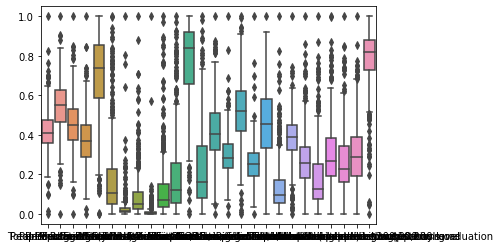

In [3]:
selected_data = data.loc[:, 'Total Population':'Fraction attaining at least high school graduation']
selected_data_normalized = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())
sb.boxplot(data=selected_data_normalized)

AS we can see the max value are outliers in most cases with a significant jump between the max value and the one before. So let's look at these

In [4]:
selected_data.iloc[selected_data_normalized[:].idxmax()]

,Total Population,Percentage Male,Percentage Female,Median age(years),Fraction White,Fraction Black or A.American,Fraction Indian or Alaskan Native,Fraction Asian,People: Race Native Hawaiian and Other Pacific Islander,Fraction Other,Fraction Hispanic or Latino,Fraction Native,Fraction Foreigner,"Fraction Management, business, science, and arts occupation",Fraction Service occupations,Fraction Sales and office occupations,"Fraction Natural resources, construction, and maintenance occupations","Fraction Production, transportation, and material moving occupations",Housing: Value Median (dollars),Total households,"Fraction of households with income below $10,000","Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation
230,1062305,0.503417,0.496583,40.1,0.886222,0.004759,0.064024,0.008017,0.000932,0.005486,0.039165,0.978004,0.021996,0.366166,0.195284,0.215477,0.115190,0.107883,249200,431421,0.063432,0.040279,55328,72648,0.130,0.939
41,713625,0.526837,0.473163,30.4,0.715163,0.042259,0.011091,0.039505,0.001917,0.160745,0.742847,0.709895,0.290105,0.176272,0.187452,0.154389,0.306931,0.174956,198600,190073,0.077923,0.020497,44561,58465,0.249,0.606
262,791211,0.450710,0.549290,36.4,0.311155,0.511726,0.002438,0.062377,0.000097,0.077270,0.178606,0.667134,0.332866,0.409978,0.242955,0.190858,0.055282,0.100927,629200,303604,0.121375,0.082202,55439,83852,0.194,0.861
96,789849,0.482576,0.517424,55.7,0.878160,0.070316,0.003435,0.011279,0.000039,0.013839,0.113182,0.932225,0.067775,0.292612,0.213875,0.258364,0.100638,0.134511,166800,331750,0.064344,0.019898,47017,61474,0.126,0.887
169,695105,0.494904,0.505096,40.8,0.970217,0.012620,0.001413,0.002516,0.000216,0.003030,0.010877,0.991780,0.008220,0.303278,0.188829,0.212491,0.117522,0.177881,86400,266607,0.147457,0.015243,35409,49534,0.265,0.779
357,712723,0.469797,0.530203,33.9,0.264117,0.672547,0.001567,0.017277,0.000104,0.028533,0.070099,0.941248,0.058752,0.287936,0.210932,0.216093,0.062319,0.222720,108700,273886,0.121131,0.026580,38077,55517,0.271,0.857
8,770392,0.504348,0.495652,38.4,0.654507,0.025077,0.234906,0.015314,0.001542,0.031477,0.229914,0.938442,0.061558,0.342264,0.211346,0.227009,0.110397,0.108984,194100,260716,0.086588,0.035859,55444,70752,0.191,0.865
37,777468,0.519678,0.480322,36.4,0.286724,0.021275,0.004273,0.562894,0.002340,0.075563,0.158935,0.504018,0.495982,0.606257,0.112134,0.155902,0.042423,0.083284,1120900,260959,0.028441,0.315594,141217,170995,0.065,0.922
127,711205,0.496822,0.503178,38.8,0.313827,0.015800,0.003668,0.257055,0.129828,0.016967,0.119624,0.855590,0.144410,0.320125,0.258935,0.211037,0.106514,0.103389,567600,224013,0.057885,0.097325,76116,99748,0.102,0.928
269,743959,0.472568,0.527432,32.1,0.173394,0.369522,0.007574,0.023310,0.002285,0.381986,0.653914,0.640475,0.359525,0.191519,0.395913,0.206117,0.059538,0.146913,426600,259910,0.189627,0.013339,30483,44995,0.338,0.680


As we can see most of the outliers are from a handful of districts. This can indicate that while the results are outliers it has more to do with the population rather thanbeing some meassurement errors, as an example having the highest population and highest numbere of households, or having highest perecentage of households over $200,000 and also highest median and mean income. The only ones which can't be determined if they are errors are those regarding ethnicity so we'll look at those below.

In [5]:
print(data.loc[170,'District'])
print(data.loc[357,'District'])
print(data.loc[8,'District'])
print(data.loc[37,'District'])
print(data.loc[128,'District'])
print(data.loc[270,'District'])
print(data.loc[110,'District'])

Kentucky 6
Tennessee 9
Arizona 1
California 17
Idaho 1
New York 16
Florida 25


Lookking up each of these districts they all appear to be reasonable max values.

We can also automate the printing for the max and min value for each variable.

In [6]:
feature = selected_data.head(0).columns.to_list()
max = selected_data_normalized[:].idxmax()
min = selected_data_normalized[:].idxmin()
for i in range(len(feature)):
    print(feature[i])
    print('Max: ', data.loc[max[i], feature[i]], 'found in: ', data.loc[max[i], 'District'])
    print('Min: ', data.loc[min[i], feature[i]], 'found in: ', data.loc[min[i], 'District'])
    

Total Population
Max:  1062305 found in:  Montana at-large
Min:  524725 found in:  Rhode Island 2
Percentage Male
Max:  0.5268369241548432 found in:  California 21
Min:  0.4507103667668928 found in:  New York 8
Percentage Female
Max:  0.5492896332331072 found in:  New York 8
Min:  0.4731630758451568 found in:  California 21
Median age(years)
Max:  55.7 found in:  Florida 11
Min:  28.4 found in:  Utah 3
Fraction White
Max:  0.9702174491623567 found in:  Kentucky 5
Min:  0.17264826882244966 found in:  Hawaii 1
Fraction Black or A.American
Max:  0.6725473991999696 found in:  Tennessee 9
Min:  0.004759461736506936 found in:  Montana at-large
Fraction Indian or Alaskan Native
Max:  0.23490638532071986 found in:  Arizona 1
Min:  0.00034694401240095734 found in:  Florida 27
Fraction Asian
Max:  0.5628939068874861 found in:  California 17
Min:  0.0020163927122422197 found in:  Mississippi 2
People: Race Native Hawaiian and Other Pacific Islander
Max:  0.12982754620678988 found in:  Hawaii 2
Mi

Some quick conclusions from this is that California 18 is the richest district and New york has the districts with lowest level of manual labor, as a percentage of total jobs.

Finally we'll look at which district is the most average, when using the median.


In [7]:
mse = []
median = selected_data_normalized.median()

for i in range(len(data)):
    error = []
    for j in range(len(feature)):
        difference = selected_data_normalized.loc[i, feature[j]]-median[j]
        diff_square = mt.pow(difference,2)
        error.append(diff_square)
    error = sum(error)
    mse.append(mt.sqrt(error / len(feature)))

## Get index of smallest mean square error
mse = np.array(mse)
idx = np.argmin(mse)

print("District with smallest mean square error, district closest to national median for all features: ", 
      data.loc[idx, 'District'])

District with smallest mean square error, district closest to national median for all features:  Pennsylvania 10


If we wanted to get inter state statistics then we would just change the dataset to, of i.e Florida

In [8]:
data_florida = data.loc[data['State'] == 'Florida ', 'Total Population':'Fraction attaining at least high school graduation']
data_florida

,Total Population,Percentage Male,Percentage Female,Median age(years),Fraction White,Fraction Black or A.American,Fraction Indian or Alaskan Native,Fraction Asian,People: Race Native Hawaiian and Other Pacific Islander,Fraction Other,Fraction Hispanic or Latino,Fraction Native,Fraction Foreigner,"Fraction Management, business, science, and arts occupation",Fraction Service occupations,Fraction Sales and office occupations,"Fraction Natural resources, construction, and maintenance occupations","Fraction Production, transportation, and material moving occupations",Housing: Value Median (dollars),Total households,"Fraction of households with income below $10,000","Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation


Before continuing we'll split the data into two sets, one for republicans and one for democrats. After which we'll look at wealth, median income and median house prices and how they relate to each other.

In [9]:
norm_d = data
norm_d.loc[:,'Total Population':'Fraction attaining at least high school graduation'] = data.loc[:,'Total Population':'Fraction attaining at least high school graduation'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data_d = data.loc[norm_d['Party'] == 'Democratic',
                 'Total Population':'Fraction attaining at least high school graduation']

data_r = data.loc[norm_d['Party'] == 'Republican',
                 'Total Population':'Fraction attaining at least high school graduation']
features = data_d.columns.tolist()

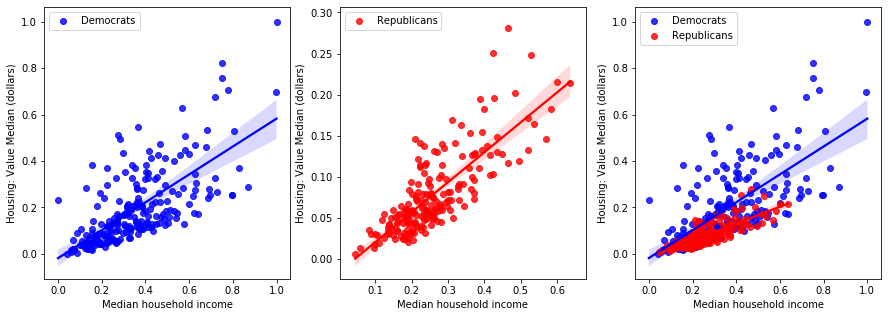

In [10]:
plt.figure(1, figsize=(15,5))
plt.subplot(131)
sb.regplot(x = 'Median household income', y = 'Housing: Value Median (dollars)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.legend()

plt.subplot(132)
sb.regplot(x = 'Median household income', y = 'Housing: Value Median (dollars)', data = data_r, scatter = True,
          label = 'Republicans', color = 'Red')
plt.legend()

plt.subplot(133)
sb.regplot(x = 'Median household income', y = 'Housing: Value Median (dollars)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
sb.regplot(x = 'Median household income', y = 'Housing: Value Median (dollars)', data = data_r, scatter = True,
          label = 'Republicans', color = 'Red')
plt.legend()



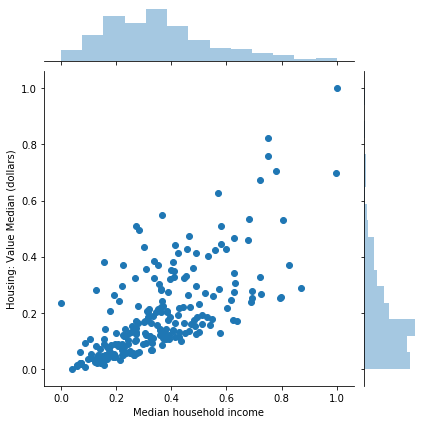

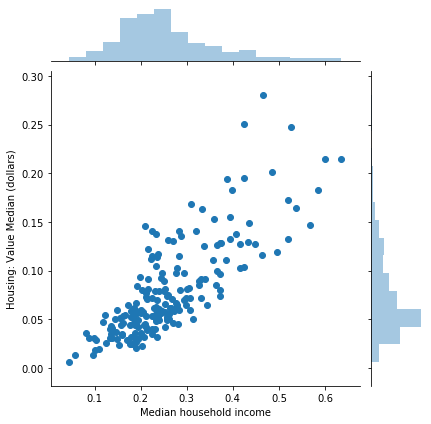

In [11]:
sb.jointplot(x = 'Median household income', y = 'Housing: Value Median (dollars)', data = data_d)
sb.jointplot(x = 'Median household income', y = 'Housing: Value Median (dollars)', data = data_r)              

In [12]:
print(data_d.loc[:,['Median household income','Housing: Value Median (dollars)']].corr())
print(data_r.loc[:,['Median household income','Housing: Value Median (dollars)']].corr()) 

                                 Median household income  \
Median household income                         1.000000   
Housing: Value Median (dollars)                 0.700434   

                                 Housing: Value Median (dollars)  
Median household income                                 0.700434  
Housing: Value Median (dollars)                         1.000000  
                                 Median household income  \
Median household income                         1.000000   
Housing: Value Median (dollars)                 0.800188   

                                 Housing: Value Median (dollars)  
Median household income                                 0.800188  
Housing: Value Median (dollars)                         1.000000  


From this we can see that in general districts with higher median housing value or those with highest median household income have voted for democtrats to the congress. If we assume that the median house value is higher in cities then that also implies that urban districts might vote more for democrats. When looking at the bivariate relation beteween the two variables we can see that the distributions for the two variables are a bit different with the data for republican districts having a lower variance but at the same time the median housing value for democrats are centered towards the lower range, 0-0.2, which also happens to cover the same interval as most of the republicans districts. Finally we looked at the correlation which shows that housing value and income is higher correlated for republicans compared to democrats, which we could also see by the steeper sloes in the scatter plots. 

Next we'll look at household income and how it is related with attained education.

                                                    Median household income  \
Median household income                                            1.000000   
Fraction attaining at least high school graduation                 0.506897   

                                                    Fraction attaining at least high school graduation  
Median household income                                                                      0.506897   
Fraction attaining at least high school graduation                                           1.000000   
                                                    Median household income  \
Median household income                                            1.000000   
Fraction attaining at least high school graduation                 0.518037   

                                                    Fraction attaining at least high school graduation  
Median household income                                                                      0.518037   

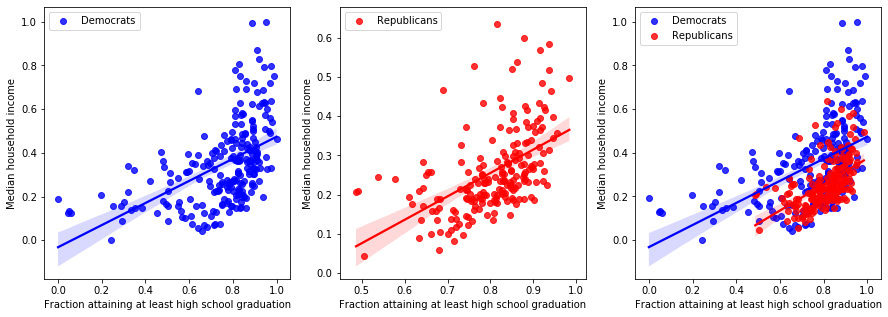

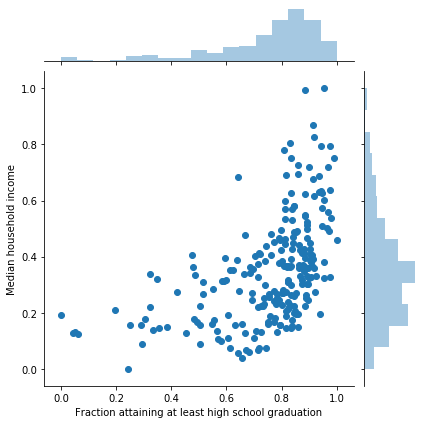

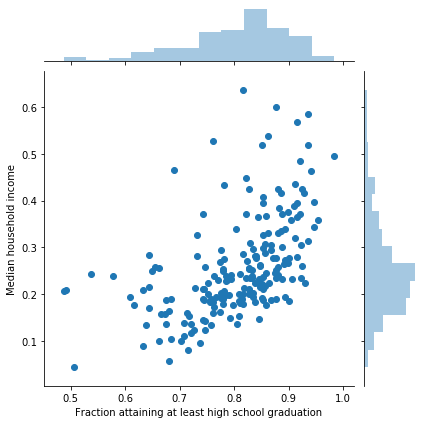

In [13]:
plt.figure(1, figsize=(15,5))
plt.subplot(131)
sb.regplot(y = 'Median household income', x = 'Fraction attaining at least high school graduation', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.legend()

plt.subplot(132)
sb.regplot(y = 'Median household income', x = 'Fraction attaining at least high school graduation', data = data_r, scatter = True,
          label = 'Republicans', color = 'Red')
plt.legend()

plt.subplot(133)
sb.regplot(y = 'Median household income', x = 'Fraction attaining at least high school graduation', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
sb.regplot(y = 'Median household income', x = 'Fraction attaining at least high school graduation', data = data_r, scatter = True,
          label = 'Republicans', color = 'Red')
plt.legend()

sb.jointplot(y = 'Median household income', x = 'Fraction attaining at least high school graduation', data = data_d)
sb.jointplot(y = 'Median household income', x = 'Fraction attaining at least high school graduation', data = data_r) 
print(data_d.loc[:,['Median household income','Fraction attaining at least high school graduation']].corr())
print(data_r.loc[:,['Median household income','Fraction attaining at least high school graduation']].corr()) 

From this it becomes obvious while democrat districts might have more high median income households this doesn't correlate particulary with the number of high school graduates.

We can also look at some income inequalities by comparing the fraction of people earning above 200,000 with the fraction earning less than, on a household basis 10,000.

                                                    Fraction of households with income at $200,000 or more  \
Fraction of households with income at $200,000 ...                                            1.00000        
Fraction of households with income below $10,000                                             -0.56517        

                                                    Fraction of households with income below $10,000  
Fraction of households with income at $200,000 ...                                          -0.56517  
Fraction of households with income below $10,000                                             1.00000  
                                                    Fraction of households with income at $200,000 or more  \
Fraction of households with income at $200,000 ...                                           1.000000        
Fraction of households with income below $10,000                                            -0.577576        

                             

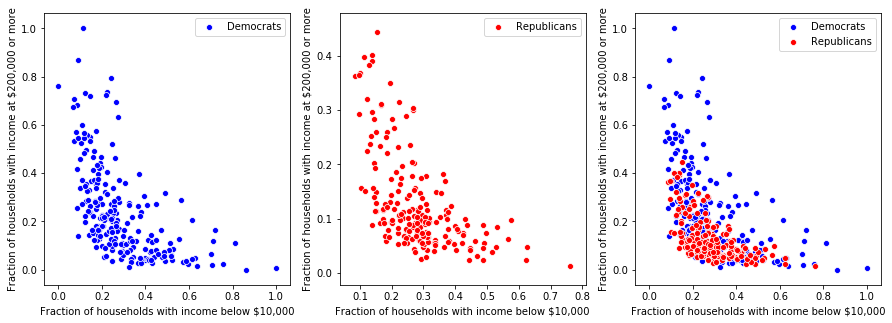

In [14]:
plt.figure(1, figsize=(15,5))
plt.subplot(131)
sb.scatterplot(y = 'Fraction of households with income at $200,000 or more', x = 'Fraction of households with income below $10,000', data = data_d, 
           label = 'Democrats', color = 'Blue')
plt.legend()

plt.subplot(132)
sb.scatterplot(y = 'Fraction of households with income at $200,000 or more', x = 'Fraction of households with income below $10,000', data = data_r,
          label = 'Republicans', color = 'Red')
plt.legend()

plt.subplot(133)
sb.scatterplot(y = 'Fraction of households with income at $200,000 or more', x = 'Fraction of households with income below $10,000', data = data_d, 
           label = 'Democrats', color = 'Blue')
sb.scatterplot(y = 'Fraction of households with income at $200,000 or more', x = 'Fraction of households with income below $10,000', data = data_r,
          label = 'Republicans', color = 'Red')
plt.legend()
 
print(data_d.loc[:,['Fraction of households with income at $200,000 or more','Fraction of households with income below $10,000']].corr())
print(data_r.loc[:,['Fraction of households with income at $200,000 or more','Fraction of households with income below $10,000']].corr()) 

What can we learn from this then? First we can tell that there is a negative correlation, which we should expect however we can also see that democratic congress members represents districts at the two opposites, both more than 200,000 and below 10,000. Furthermore we can also see that democrats represents the most unequal districts, having both higher fraction above 200,000 and below 10,000.

Now we'll instead look at how the jobb market is divided and it's relation to househdol income

                                       Median household income  \
Median household income                               1.000000   
Fraction Sales and office occupations                -0.258174   

                                       Fraction Sales and office occupations  
Median household income                                            -0.258174  
Fraction Sales and office occupations                               1.000000  
                                       Median household income  \
Median household income                               1.000000   
Fraction Sales and office occupations                 0.243296   

                                       Fraction Sales and office occupations  
Median household income                                             0.243296  
Fraction Sales and office occupations                               1.000000  


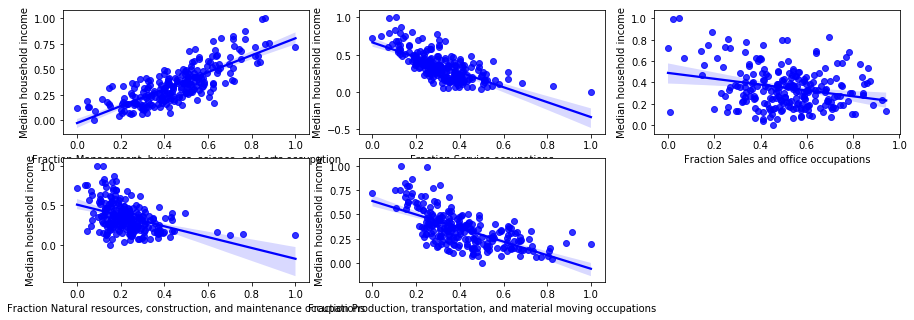

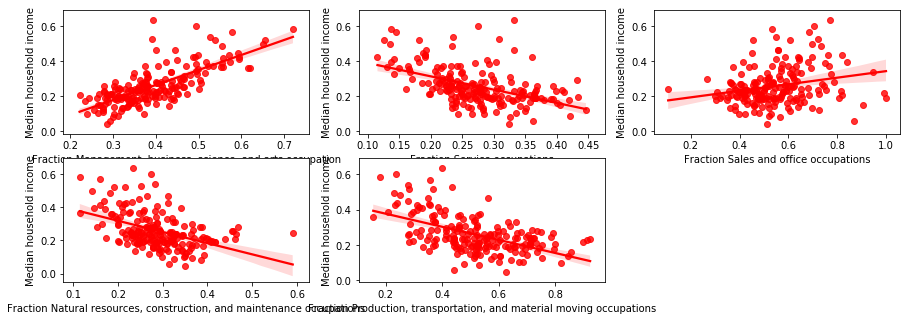

In [15]:
plt.figure(2, figsize=(15,5))

plt.subplot(231)
sb.regplot(x = 'Fraction Management, business, science, and arts occupation', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.subplot(232)
sb.regplot(x = 'Fraction Service occupations', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(233)
sb.regplot(x = 'Fraction Sales and office occupations', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(234)
sb.regplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(235)
sb.regplot(x = 'Fraction Production, transportation, and material moving occupations', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.figure(3, figsize=(15,5))

plt.subplot(231)
sb.regplot(x = 'Fraction Management, business, science, and arts occupation', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')
plt.subplot(232)
sb.regplot(x = 'Fraction Service occupations', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(233)
sb.regplot(x = 'Fraction Sales and office occupations', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(234)
sb.regplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(235)
sb.regplot(x = 'Fraction Production, transportation, and material moving occupations', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

print(data_d.loc[:,['Median household income','Fraction Sales and office occupations']].corr())
print(data_r.loc[:,['Median household income','Fraction Sales and office occupations']].corr())



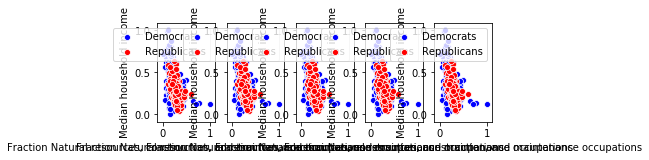

In [16]:
plt.subplot(251)
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_d, 
           label = 'Democrats', color = 'Blue')
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_r,
          label = 'Republicans', color = 'Red')

plt.subplot(252)
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_d, 
           label = 'Democrats', color = 'Blue')
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_r,
          label = 'Republicans', color = 'Red')

plt.subplot(253)
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_d, 
           label = 'Democrats', color = 'Blue')
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_r,
          label = 'Republicans', color = 'Red')

plt.subplot(254)
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_d, 
           label = 'Democrats', color = 'Blue')
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_r,
          label = 'Republicans', color = 'Red')

plt.subplot(255)
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_d, 
           label = 'Democrats', color = 'Blue')
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median household income', data = data_r,
          label = 'Republicans', color = 'Red')

plt.legend()

What we can clearly see is that a larger share of Fraction Management, business, science, and arts occupation in a distirct contributes to higher median household income but something more interesting is the difference in how the fraction os sales and office occupations affects the income, in democratic district this has a negative correlation while in republican districts it has apossitive correation. However the correlation in both cases are fairly low hence outliers can skew the results in both directions. 

Next we'll look at how the income relates to the median age.

                         Median household income  Median age(years)
Median household income                 1.000000           0.336736
Median age(years)                       0.336736           1.000000
                         Median household income  Median age(years)
Median household income                 1.000000          -0.158745
Median age(years)                      -0.158745           1.000000


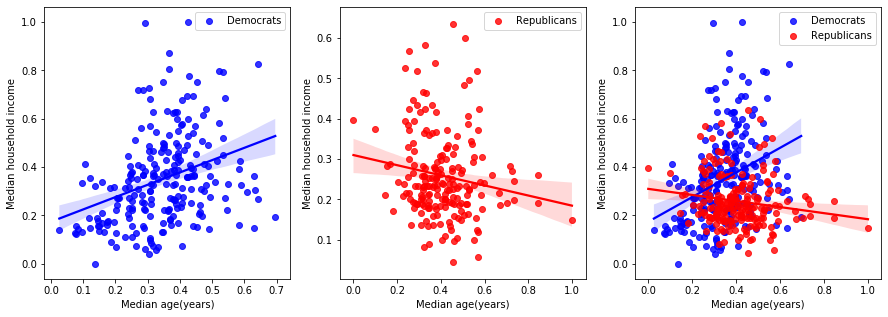

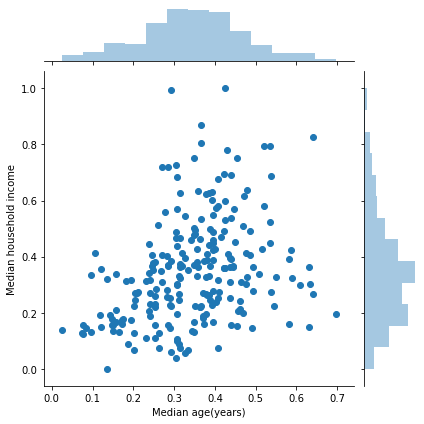

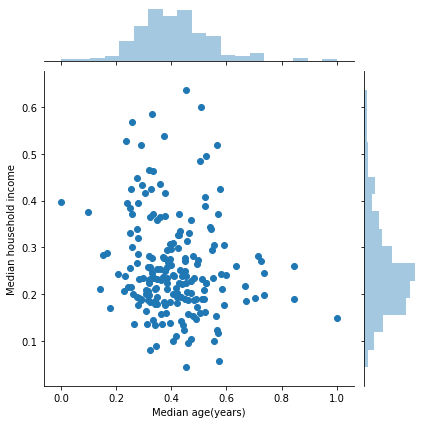

In [17]:
plt.figure(1, figsize=(15,5))
plt.subplot(131)
sb.regplot(y = 'Median household income', x = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.legend()

plt.subplot(132)
sb.regplot(y = 'Median household income', x = 'Median age(years)', data = data_r, scatter = True,
          label = 'Republicans', color = 'Red')
plt.legend()

plt.subplot(133)
sb.regplot(y = 'Median household income', x = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
sb.regplot(y = 'Median household income', x = 'Median age(years)', data = data_r, scatter = True,
          label = 'Republicans', color = 'Red')
plt.legend()

sb.jointplot(y = 'Median household income', x = 'Median age(years)', data = data_d)
sb.jointplot(y = 'Median household income', x = 'Median age(years)', data = data_r) 
print(data_d.loc[:,['Median household income','Median age(years)']].corr())
print(data_r.loc[:,['Median household income','Median age(years)']].corr()) 

Here we can note two interesting thing first the positive/negative correlation between median income and median age where democrats have a positive correlation and republicans a negative correlation which is half a strong as for the deomcrats. The second thing to note is that the democrats have a wider spread of age while republicans are more centered while at teh same time republicans have the districts with lowest median age.

We now move on to the labour market compared with median age.

                                                    Median age(years)  \
Median age(years)                                            1.000000   
Fraction Management, business, science, and art...           0.387647   

                                                    Fraction Management, business, science, and arts occupation  
Median age(years)                                                                            0.387647            
Fraction Management, business, science, and art...                                           1.000000            
                                                    Median age(years)  \
Median age(years)                                            1.000000   
Fraction Management, business, science, and art...          -0.192996   

                                                    Fraction Management, business, science, and arts occupation  
Median age(years)                                                                           -0.192996   

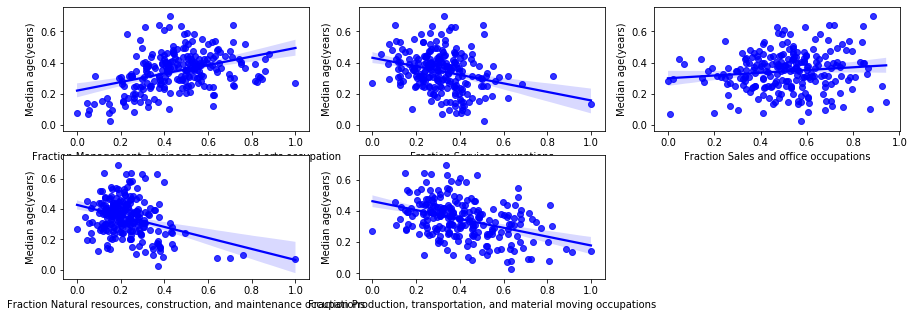

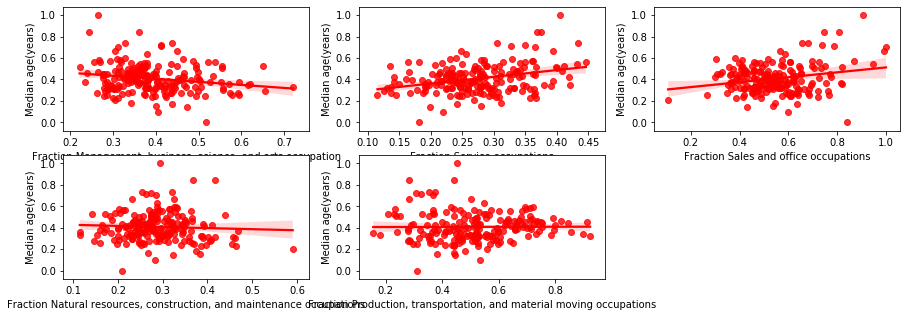

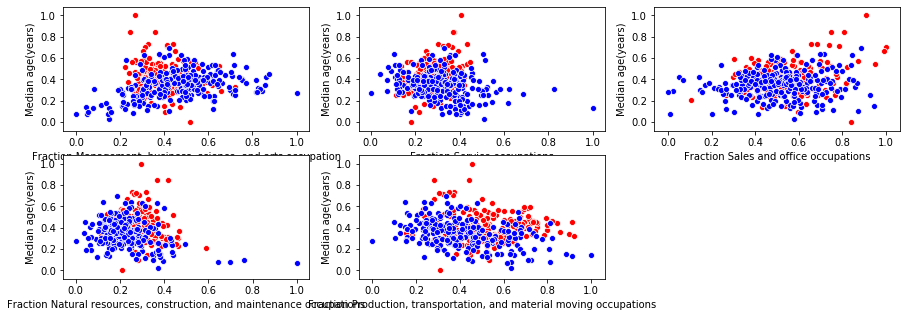

In [18]:
plt.figure(1, figsize=(15,5))

plt.subplot(231)
sb.regplot(x = 'Fraction Management, business, science, and arts occupation', y = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.subplot(232)
sb.regplot(x = 'Fraction Service occupations', y = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(233)
sb.regplot(x = 'Fraction Sales and office occupations', y = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(234)
sb.regplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(235)
sb.regplot(x = 'Fraction Production, transportation, and material moving occupations', y = 'Median age(years)', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.figure(2, figsize=(15,5))

plt.subplot(231)
sb.regplot(x = 'Fraction Management, business, science, and arts occupation', y = 'Median age(years)', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')
plt.subplot(232)
sb.regplot(x = 'Fraction Service occupations', y = 'Median age(years)', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(233)
sb.regplot(x = 'Fraction Sales and office occupations', y = 'Median age(years)', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(234)
sb.regplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median age(years)', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(235)
sb.regplot(x = 'Fraction Production, transportation, and material moving occupations', y = 'Median age(years)', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.figure(3, figsize=(15,5))

plt.subplot(231)
sb.scatterplot(x = 'Fraction Management, business, science, and arts occupation', y = 'Median age(years)', data = data_r,
           color = 'Red')
sb.scatterplot(x = 'Fraction Management, business, science, and arts occupation', y = 'Median age(years)', data = data_d,
           color = 'Blue')

plt.subplot(232)
sb.scatterplot(x = 'Fraction Service occupations', y = 'Median age(years)', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Service occupations', y = 'Median age(years)', data = data_d,
               color = 'Blue')

plt.subplot(233)
sb.scatterplot(x = 'Fraction Sales and office occupations', y = 'Median age(years)', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Sales and office occupations', y = 'Median age(years)', data = data_d,
               color = 'Blue')

plt.subplot(234)
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median age(years)', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Natural resources, construction, and maintenance occupations', y = 'Median age(years)', data = data_d,
               color = 'Blue')

plt.subplot(235)
sb.scatterplot(x = 'Fraction Production, transportation, and material moving occupations', y = 'Median age(years)', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Production, transportation, and material moving occupations', y = 'Median age(years)', data = data_d,
               color = 'Blue')



print(data_d.loc[:,['Median age(years)','Fraction Management, business, science, and arts occupation']].corr())
print(data_r.loc[:,['Median age(years)','Fraction Management, business, science, and arts occupation']].corr())

print(data_d.loc[:,['Median age(years)','Fraction Service occupations']].corr())
print(data_r.loc[:,['Median age(years)','Fraction Service occupations']].corr())

print(data_d.loc[:,['Median age(years)','Fraction Sales and office occupations']].corr())
print(data_r.loc[:,['Median age(years)','Fraction Sales and office occupations']].corr())

print(data_d.loc[:,['Median age(years)','Fraction Natural resources, construction, and maintenance occupations']].corr())
print(data_r.loc[:,['Median age(years)','Fraction Natural resources, construction, and maintenance occupations']].corr())

print(data_d.loc[:,['Median age(years)','Fraction Production, transportation, and material moving occupations']].corr())
print(data_r.loc[:,['Median age(years)','Fraction Production, transportation, and material moving occupations']].corr())


From this we can see that the labor market isn't clearly divided, both parties have districts with the same median age span and fraction of occupations, FOO. Furthermore for republic voter districts there's barely any correlation between median age and  FOO while for democrat voting districts theres a clear correlation, not explained but outliers between 'Fraction Management, business, science, and arts occupation' and median age.

Continuing with the demographics we can look at how different ethnicities correlates to the three income meassurements, income above 200,000, below 10,000 and median income.

starting with median income

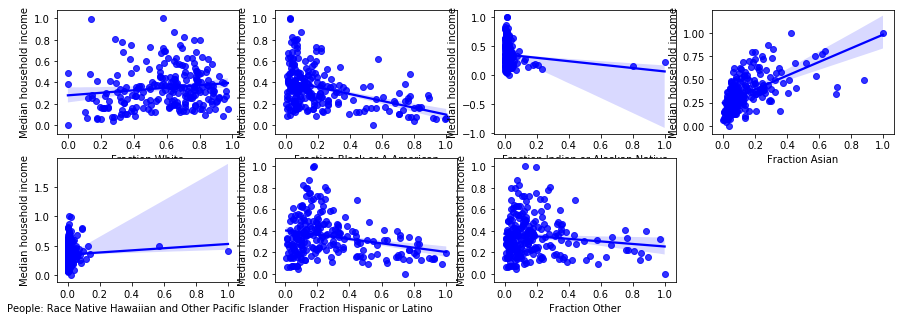

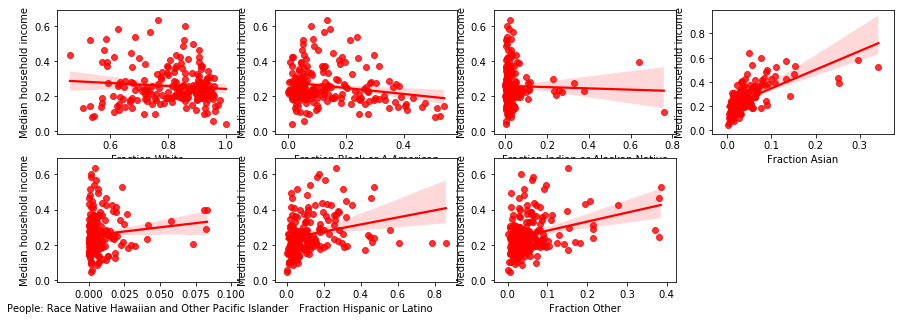

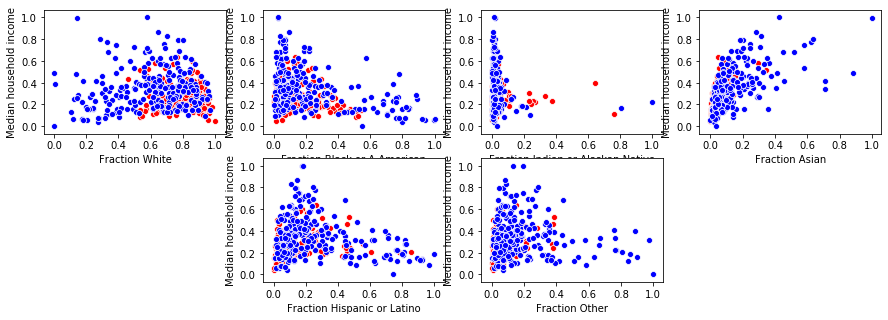

In [19]:
plt.figure(1, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Median household income', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.figure(2, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Median household income', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.figure(3, figsize=(15,5))

plt.subplot(241)
sb.scatterplot(x = 'Fraction White', y = 'Median household income', data = data_r,
           color = 'Red')
sb.scatterplot(x = 'Fraction White', y = 'Median household income', data = data_d,
           color = 'Blue')

plt.subplot(242)
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Median household income', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Median household income', data = data_d,
               color = 'Blue')

plt.subplot(243)
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Median household income', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Median household income', data = data_d,
               color = 'Blue')

plt.subplot(244)
sb.scatterplot(x = 'Fraction Asian', y = 'Median household income', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Asian', y = 'Median household income', data = data_d,
               color = 'Blue')

plt.subplot(246)
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Median household income', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Median household income', data = data_d,
               color = 'Blue')

plt.subplot(247)
sb.scatterplot(x = 'Fraction Other', y = 'Median household income', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Other', y = 'Median household income', data = data_d,
               color = 'Blue')


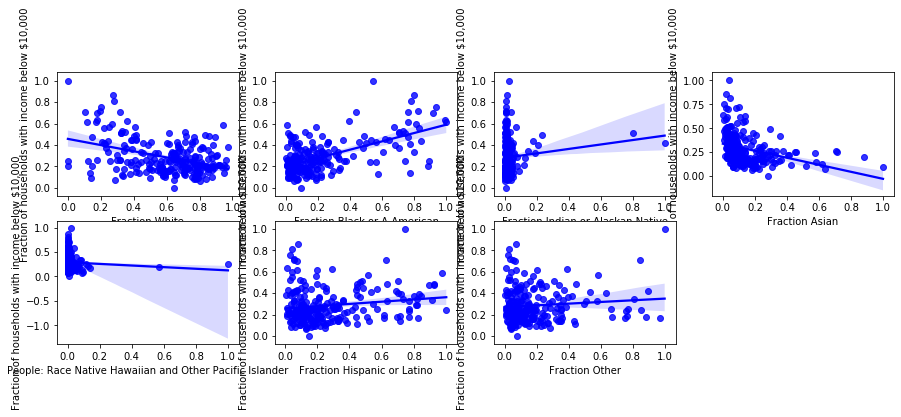

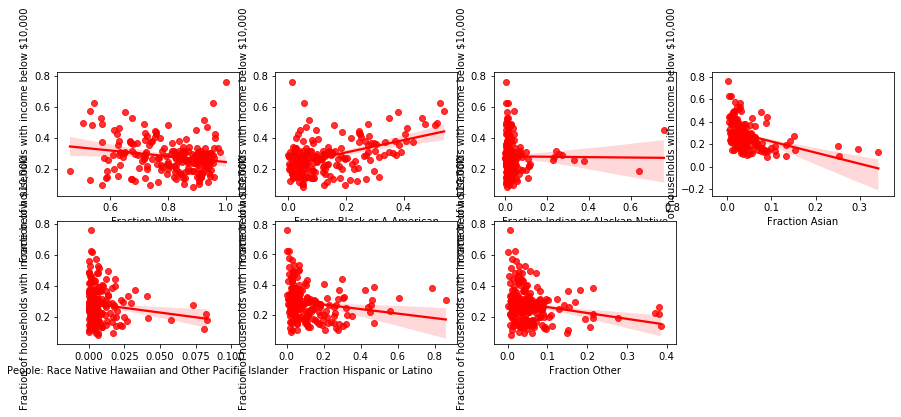

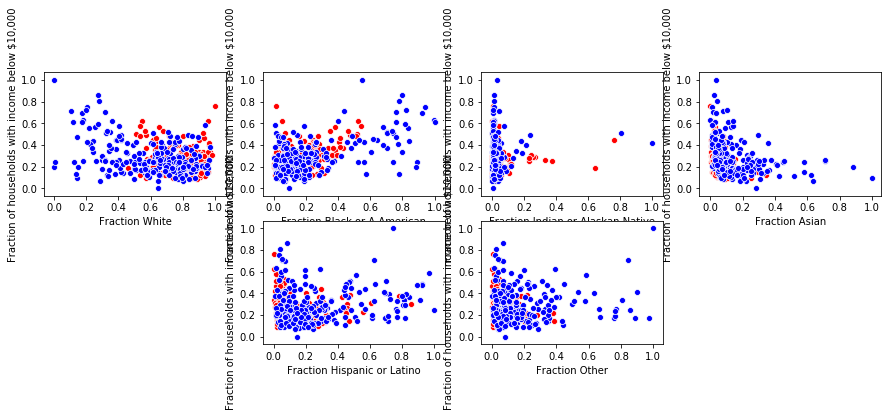

In [20]:
plt.figure(1, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Fraction of households with income below $10,000', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.figure(2, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Fraction of households with income below $10,000', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.figure(3, figsize=(15,5))

plt.subplot(241)
sb.scatterplot(x = 'Fraction White', y = 'Fraction of households with income below $10,000', data = data_r,
           color = 'Red')
sb.scatterplot(x = 'Fraction White', y = 'Fraction of households with income below $10,000', data = data_d,
           color = 'Blue')

plt.subplot(242)
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income below $10,000', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income below $10,000', data = data_d,
               color = 'Blue')

plt.subplot(243)
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income below $10,000', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income below $10,000', data = data_d,
               color = 'Blue')

plt.subplot(244)
sb.scatterplot(x = 'Fraction Asian', y = 'Fraction of households with income below $10,000', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Asian', y = 'Fraction of households with income below $10,000', data = data_d,
               color = 'Blue')

plt.subplot(246)
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income below $10,000', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income below $10,000', data = data_d,
               color = 'Blue')

plt.subplot(247)
sb.scatterplot(x = 'Fraction Other', y = 'Fraction of households with income below $10,000', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Other', y = 'Fraction of households with income below $10,000', data = data_d,
               color = 'Blue')


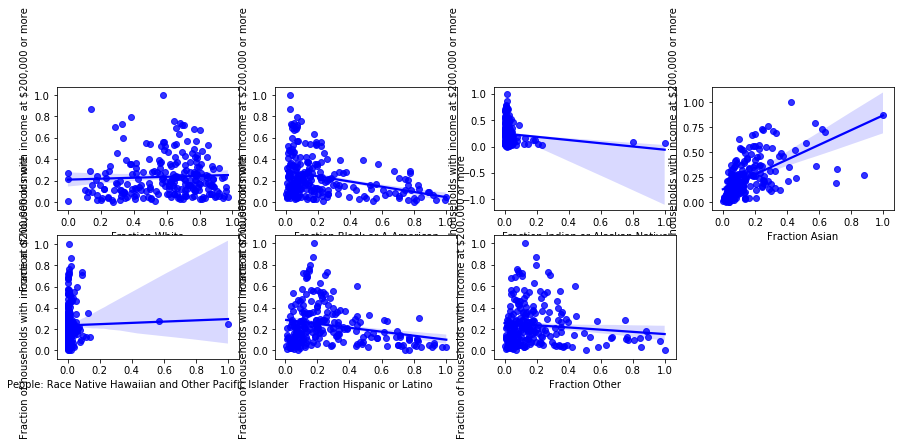

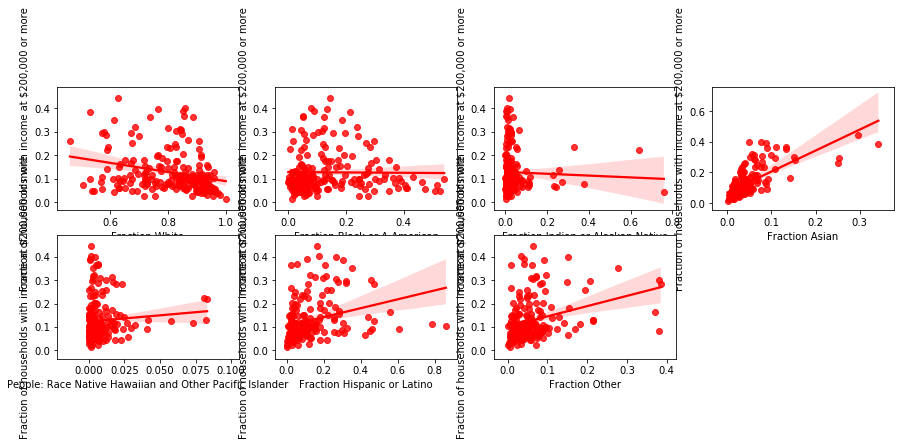

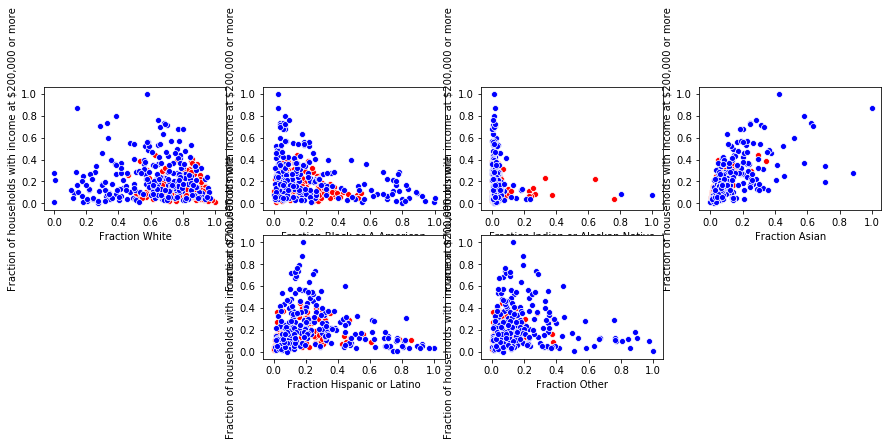

In [21]:
plt.figure(1, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Fraction of households with income at $200,000 or more', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.figure(2, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Fraction of households with income at $200,000 or more', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.figure(3, figsize=(15,5))

plt.subplot(241)
sb.scatterplot(x = 'Fraction White', y = 'Fraction of households with income at $200,000 or more', data = data_r,
           color = 'Red')
sb.scatterplot(x = 'Fraction White', y = 'Fraction of households with income at $200,000 or more', data = data_d,
           color = 'Blue')

plt.subplot(242)
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income at $200,000 or more', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Fraction of households with income at $200,000 or more', data = data_d,
               color = 'Blue')

plt.subplot(243)
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income at $200,000 or more', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of households with income at $200,000 or more', data = data_d,
               color = 'Blue')

plt.subplot(244)
sb.scatterplot(x = 'Fraction Asian', y = 'Fraction of households with income at $200,000 or more', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Asian', y = 'Fraction of households with income at $200,000 or more', data = data_d,
               color = 'Blue')

plt.subplot(246)
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income at $200,000 or more', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of households with income at $200,000 or more', data = data_d,
               color = 'Blue')

plt.subplot(247)
sb.scatterplot(x = 'Fraction Other', y = 'Fraction of households with income at $200,000 or more', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Other', y = 'Fraction of households with income at $200,000 or more', data = data_d,
               color = 'Blue')


In [22]:
data_d

,Total Population,Percentage Male,Percentage Female,Median age(years),Fraction White,Fraction Black or A.American,Fraction Indian or Alaskan Native,Fraction Asian,People: Race Native Hawaiian and Other Pacific Islander,Fraction Other,Fraction Hispanic or Latino,Fraction Native,Fraction Foreigner,"Fraction Management, business, science, and arts occupation",Fraction Service occupations,Fraction Sales and office occupations,"Fraction Natural resources, construction, and maintenance occupations","Fraction Production, transportation, and material moving occupations",Housing: Value Median (dollars),Total households,"Fraction of households with income below $10,000","Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation
6,0.252508,0.253430,0.746570,0.293040,0.204098,0.938078,0.010831,0.009921,0.002402,0.020437,0.031873,0.966634,0.033366,0.297799,0.325107,0.408806,0.241185,0.773366,0.014744,0.269961,0.755883,0.021555,0.059724,0.047868,0.693603,0.680851
8,0.456987,0.704591,0.295409,0.366300,0.604159,0.030425,1.000000,0.023709,0.011878,0.079496,0.255919,0.902737,0.097263,0.357406,0.397610,0.636462,0.326361,0.352066,0.078011,0.312286,0.418632,0.071818,0.224514,0.160999,0.505051,0.734043
9,0.372079,0.565989,0.434011,0.457875,0.793971,0.051696,0.077046,0.049948,0.012105,0.141575,0.327738,0.818873,0.181127,0.443849,0.455104,0.497295,0.226395,0.275542,0.079753,0.467841,0.290731,0.109584,0.205157,0.178770,0.306397,0.848404
10,0.509011,0.692331,0.307669,0.146520,0.669597,0.068291,0.212151,0.033803,0.022007,0.323865,0.722215,0.626431,0.373569,0.210516,0.444029,0.520302,0.441910,0.531752,0.061792,0.262677,0.396628,0.039402,0.178165,0.122920,0.555556,0.481383
14,0.613907,0.644050,0.355950,0.025641,0.674519,0.137709,0.149197,0.037741,0.001586,0.237734,0.729787,0.551927,0.448073,0.150836,0.511886,0.576517,0.372760,0.632291,0.070304,0.270336,0.343718,0.050258,0.140046,0.113331,0.612795,0.332447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.447487,0.713820,0.286180,0.304029,0.385173,0.183360,0.026966,0.412307,0.124906,0.187472,0.144346,0.466219,0.533781,0.550853,0.297612,0.310339,0.155293,0.405673,0.296629,0.416629,0.215227,0.353501,0.488271,0.444781,0.235690,0.843085
418,0.430267,0.562471,0.437529,0.267399,0.686598,0.091136,0.048421,0.123028,0.139140,0.086086,0.132288,0.807856,0.192144,0.383066,0.352708,0.462596,0.283364,0.481634,0.157228,0.381922,0.163055,0.122546,0.349808,0.257585,0.185185,0.880319
423,0.452662,0.603918,0.396082,0.311355,0.861815,0.057996,0.019208,0.074122,0.001946,0.038569,0.068218,0.883012,0.116988,0.574845,0.216377,0.265447,0.217147,0.401828,0.109510,0.547834,0.180617,0.162847,0.331999,0.277725,0.222222,0.922872
424,0.371746,0.679668,0.320332,0.388278,0.950509,0.009088,0.019032,0.039186,0.001510,0.023858,0.023623,0.965962,0.034038,0.326167,0.274387,0.447428,0.275674,0.716138,0.058642,0.441171,0.216714,0.054730,0.247081,0.167213,0.269360,0.896277


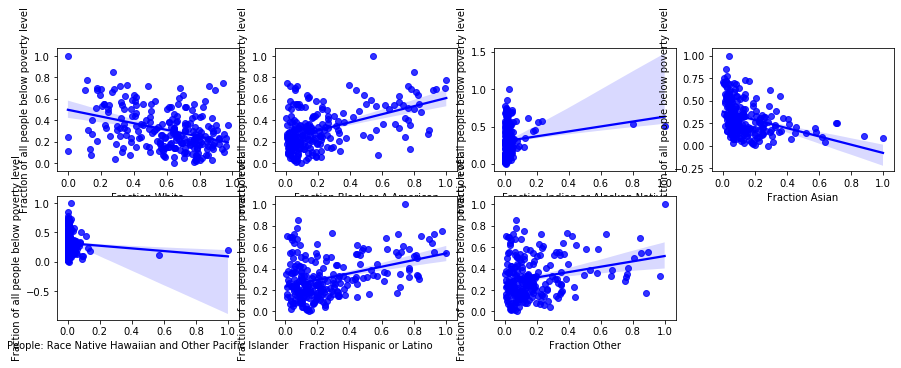

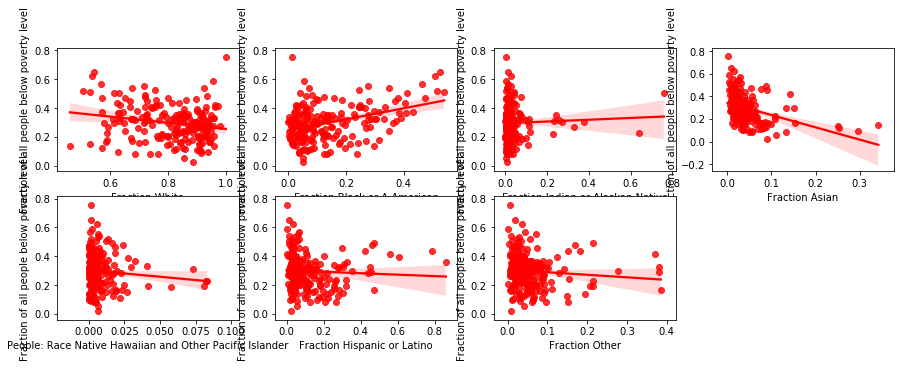

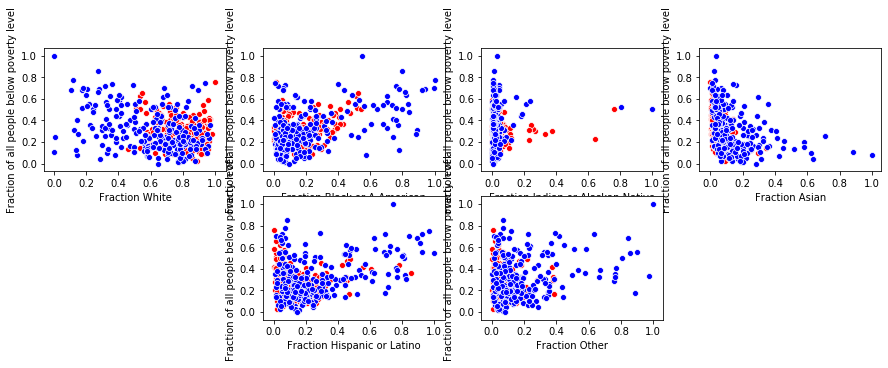

In [23]:
plt.figure(1, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Fraction of all people below poverty level', data = data_d, scatter = True, 
           label = 'Democrats', color = 'Blue')

plt.figure(2, figsize=(15,5))

plt.subplot(241)
sb.regplot(x = 'Fraction White', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')
plt.subplot(242)
sb.regplot(x = 'Fraction Black or A.American', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(243)
sb.regplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(244)
sb.regplot(x = 'Fraction Asian', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(245)
sb.regplot(x = 'People: Race Native Hawaiian and Other Pacific Islander', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(246)
sb.regplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.subplot(247)
sb.regplot(x = 'Fraction Other', y = 'Fraction of all people below poverty level', data = data_r, scatter = True, 
           label = 'Republicans', color = 'Red')

plt.figure(3, figsize=(15,5))

plt.subplot(241)
sb.scatterplot(x = 'Fraction White', y = 'Fraction of all people below poverty level', data = data_r,
           color = 'Red')
sb.scatterplot(x = 'Fraction White', y = 'Fraction of all people below poverty level', data = data_d,
           color = 'Blue')

plt.subplot(242)
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Fraction of all people below poverty level', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Black or A.American', y = 'Fraction of all people below poverty level', data = data_d,
               color = 'Blue')

plt.subplot(243)
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of all people below poverty level', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Indian or Alaskan Native', y = 'Fraction of all people below poverty level', data = data_d,
               color = 'Blue')

plt.subplot(244)
sb.scatterplot(x = 'Fraction Asian', y = 'Fraction of all people below poverty level', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Asian', y = 'Fraction of all people below poverty level', data = data_d,
               color = 'Blue')

plt.subplot(246)
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of all people below poverty level', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Hispanic or Latino', y = 'Fraction of all people below poverty level', data = data_d,
               color = 'Blue')

plt.subplot(247)
sb.scatterplot(x = 'Fraction Other', y = 'Fraction of all people below poverty level', data = data_r,
               color = 'Red')
sb.scatterplot(x = 'Fraction Other', y = 'Fraction of all people below poverty level', data = data_d,
               color = 'Blue')


Judging by this there is only a handful of conculsion one can draw. When the fraction of Asian or whites increases the number of people living in poverty decreases and as fraction of Asians increases the number of household at or above 200,000 increases slightly. 

So far there haven't been any clear statistics for what makes a district vote republican and what makes it vote democratic. The last things we'll look at is the distribution of native born or foreign born and if the dominant sector affect the results or not.

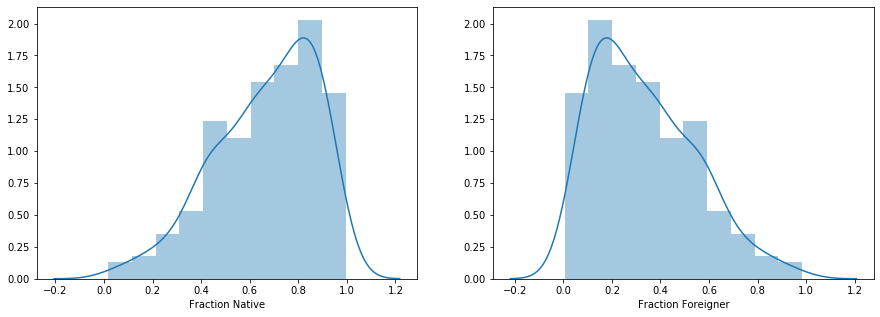

In [24]:
plt.figure(1, figsize=(15,5))
plt.subplot(121)
sb.distplot(data_d['Fraction Native'])
plt.subplot(122)
sb.distplot(data_d['Fraction Foreigner'])

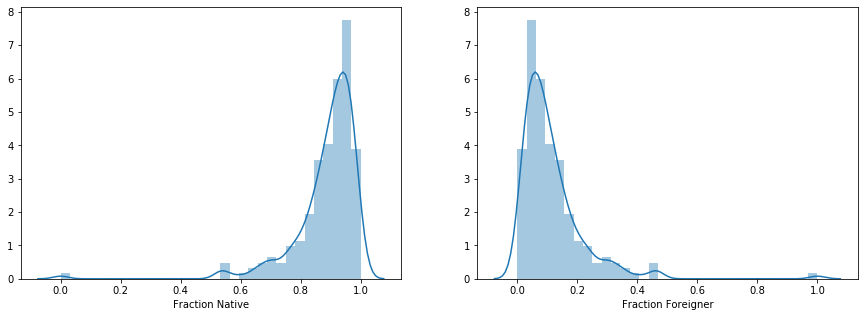

In [25]:
plt.figure(1, figsize=(15,5))
plt.subplot(121)
sb.distplot(data_r['Fraction Native'])
plt.subplot(122)
sb.distplot(data_r['Fraction Foreigner'])

AS logic dictates the two curves, native and foreigner, are each others mirrors since they capture the same stats. At the same time this is a case where we get somewhat of a separation or rather what we can tell is that virtually no republican district has above 40% foreigners. Now we'll look at which sector is largest from the three metrics 'Most Employees', 'Largest Payroll', 'Most Establishments'

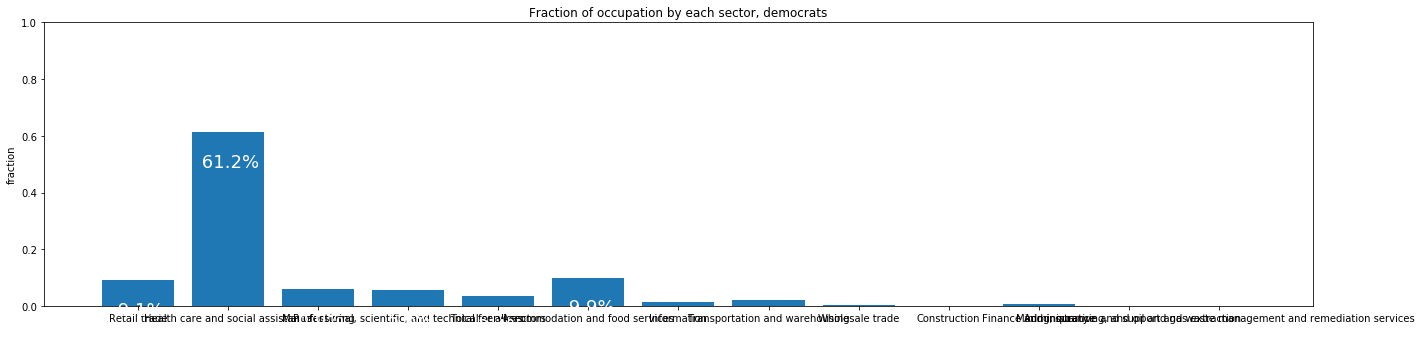

In [26]:
sector_d = data.loc[norm_d['Party'] == 'Democratic','Most Employees':'Most Establishments']
sector = data['Most Employees'].unique()
count = []
for i in range(len(sector)):
    occ = sector_d['Most Employees'].str.count(sector[i]).sum()
    count.append(occ)
tot = sum(count)
plt.figure(1, figsize = (20,5))
plt.bar(sector, count / tot ) #Give each class a color
ax = plt.gca() #set axis
ax.set(title = 'Fraction of occupation by each sector, democrats', ylabel = 'fraction') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()


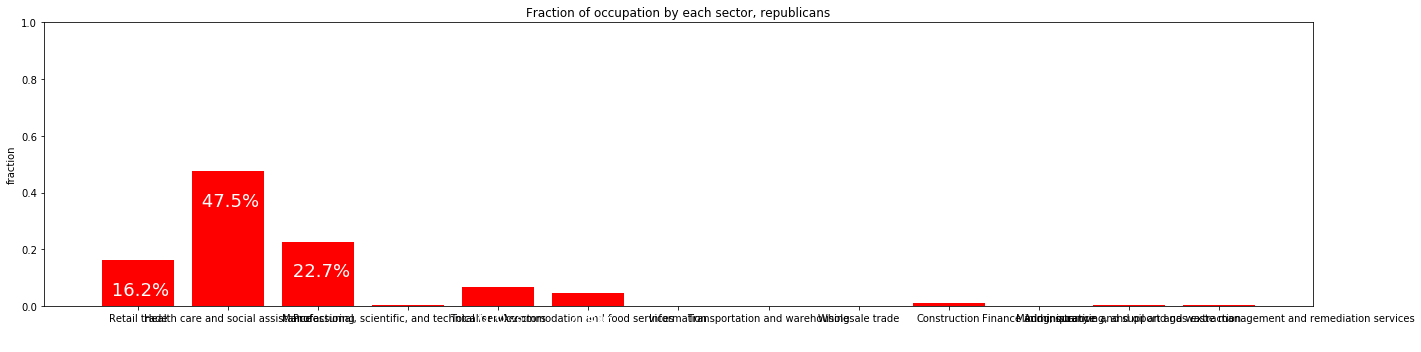

In [27]:
sector_r = data.loc[norm_d['Party'] == 'Republican','Most Employees':'Most Establishments']
count = []
for i in range(len(sector)):
    occ = sector_r['Most Employees'].str.count(sector[i]).sum()
    count.append(occ)
tot = sum(count)
plt.figure(1, figsize=(20,5))
plt.bar(sector, count / tot, color = 'Red' ) #Give each class a color
ax = plt.gca() #set axis
ax.set(title = 'Fraction of occupation by each sector, republicans', ylabel = 'fraction') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()


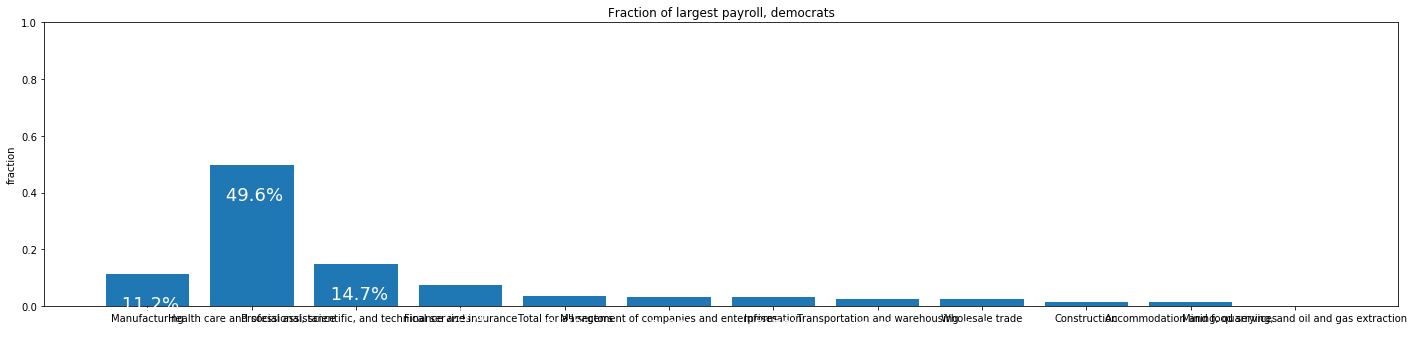

In [28]:
sector = data['Largest Payroll'].unique()
count = []
for i in range(len(sector)):
    occ = sector_d['Largest Payroll'].str.count(sector[i]).sum()
    count.append(occ)
tot = sum(count)
plt.figure(1, figsize=(20,5))
plt.bar(sector, count / tot ) #Give each class a color
ax = plt.gca() #set axis
ax.set(title = 'Fraction of largest payroll, democrats', ylabel = 'fraction') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

In [29]:
sector

array(['Manufacturing', 'Health care and social assistance',
       'Professional, scientific, and technical services',
       'Finance and insurance', 'Total for all sectors',
       'Management of companies and enterprises', 'Information',
       'Transportation and warehousing', 'Wholesale trade',
       'Construction', 'Accommodation and food services',
       'Mining, quarrying, and oil and gas extraction'], dtype=object)

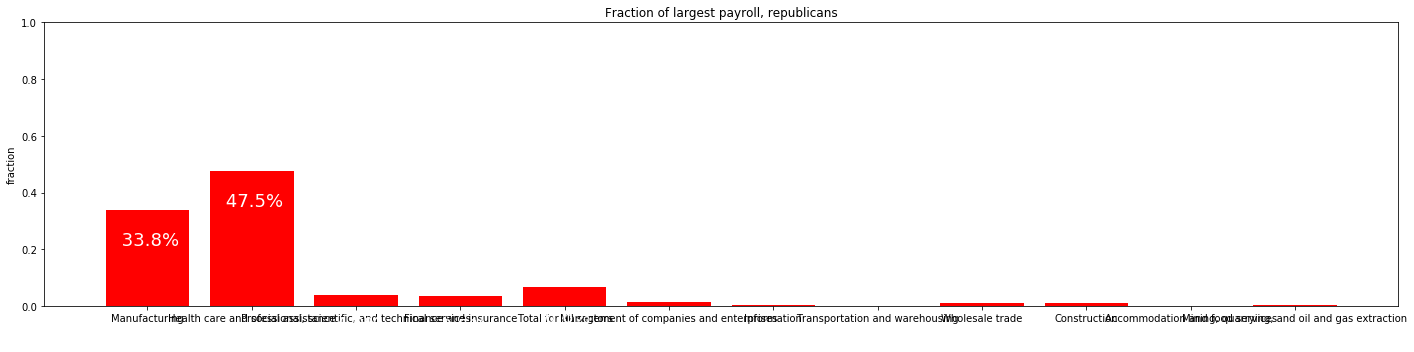

In [30]:
count = []
for i in range(len(sector)):
    occ = sector_r['Largest Payroll'].str.count(sector[i]).sum()
    count.append(occ)
tot = sum(count)
plt.figure(1, figsize=(20,5))
plt.bar(sector, count / tot, color = 'Red' ) #Give each class a color
ax = plt.gca() #set axis
ax.set(title = 'Fraction of largest payroll, republicans', ylabel = 'fraction') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

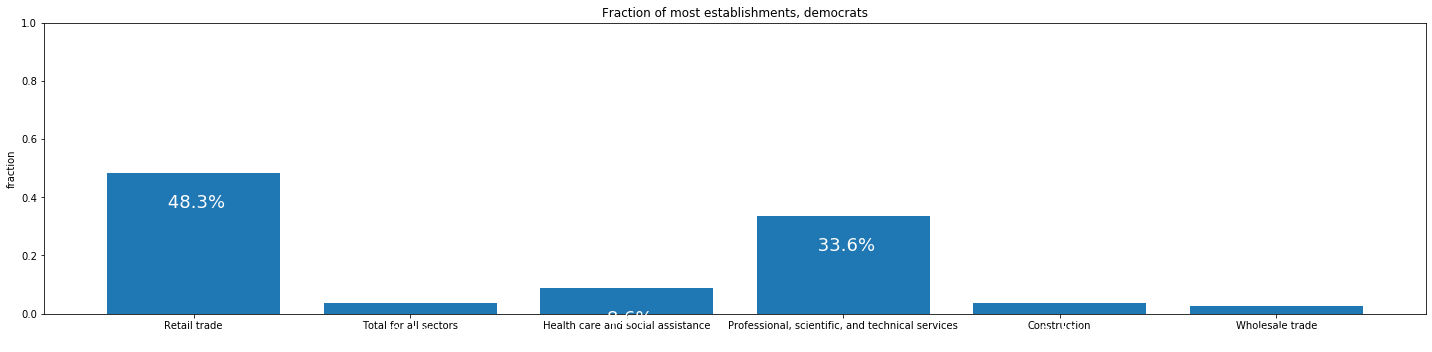

In [31]:
sector = data['Most Establishments'].unique()
count = []
for i in range(len(sector)):
    occ = sector_d['Most Establishments'].str.count(sector[i]).sum()
    count.append(occ)
tot = sum(count)
plt.figure(1, figsize = (20,5))
plt.bar(sector, count / tot ) 
ax = plt.gca() #set axis
ax.set(title = 'Fraction of most establishments, democrats', ylabel = 'fraction') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

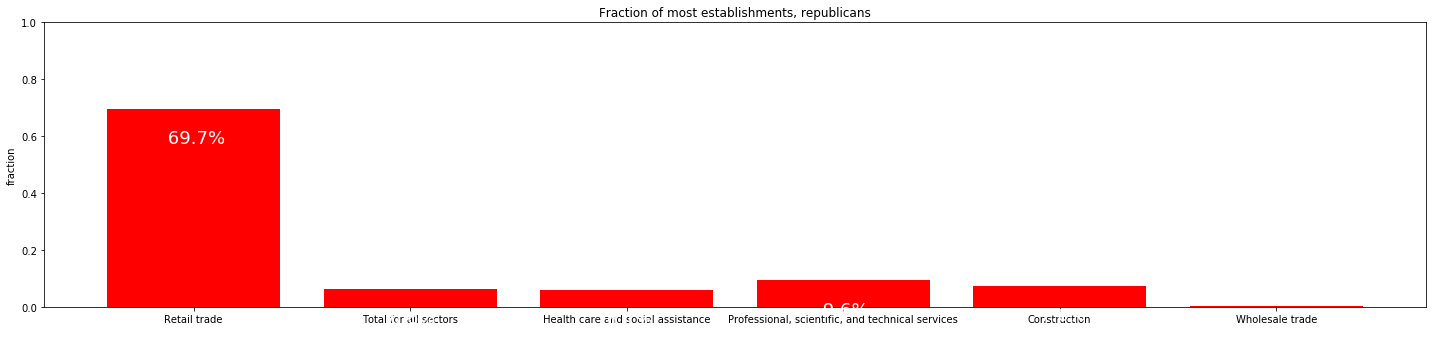

In [32]:
sector = data['Most Establishments'].unique()
count = []
for i in range(len(sector)):
    occ = sector_r['Most Establishments'].str.count(sector[i]).sum()
    count.append(occ)
tot = sum(count)
plt.figure(1, figsize = (20,5))
plt.bar(sector, count / tot, color = 'Red' ) 
ax = plt.gca() #set axis
ax.set(title = 'Fraction of most establishments, republicans', ylabel = 'fraction') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

This might be the statistics which shows the largest difference between the two parties. For republicans a significant higher amount of districts have manufacturing and retail trade as it's largest employers while democrats ruled districts have by a vast majority health care and social assistance as its largest employer. Looking at payroll republic districts have manufacturing and health care as the largest payers, since largest payroll says what industry pays the most, at around 80 percent of the total districts meanwhile 49,4% of democrats controlled districts have health care providing the highest payroll which is then followed by 15% 'Professional, scientific, and technical services' and 11.2% manufacturing. Finally we looked at total number of establishments where 69.5% of republican districts reporting that retail trade had the highest fraction of establishments. On the other hand for democrats districts retail trade was the most numerous in 48.1% of the districts and 'Professional, scitenfic and technical services' being the most numerous in 33.9% of the districts.

This then concludes our exploration about the districts data. As we saw trying to find clear differences to divide the two districts after how they vote are hard. In the next notebook we'll look at applying machine learning algorithms to try and create a model to determine how a district will vote from the given census data, though as we saw in the data exploratory about congress members some where elected in the 70s-80s and since the census data is from 2019 it has probably changed alot since then.